In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from scipy.spatial.distance import squareform, pdist

sns.set(style='whitegrid', context='notebook', palette='Set2')

In [10]:
# read CSV
df_data  = pd.read_csv('../../data/some.csv')
df_data = df_data.drop(columns=['Unnamed: 0'])

## explore dataset

In [11]:
def drop_outlier(df):
  for i, col in df.iteritems():
    #四分位数
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)

    iqr = q3 - q1 #四分位範囲

    #外れ値の基準点
    outlier_min = q1 - (iqr) * 1.5
    outlier_max = q3 + (iqr) * 1.5

    #範囲から外れている値を除く
    col[col < outlier_min] = None
    col[col > outlier_max] = None

drop_outlier(df_data)
df_data = df_data.dropna()

/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


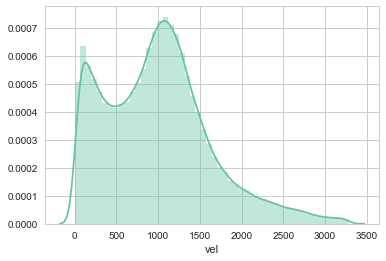

In [12]:
sns.distplot(df_data['vel'])

In [13]:
df_data.describe()

,index,id,new_frame,frame,wx,wz,vel,dist,minD
count,176980.000000,176980.000000,176980.000000,1.769800e+05,176980.000000,176980.000000,176980.000000,176980.000000,176980.000000
mean,126328.073178,121297.749265,43163.148192,8.632711e+05,760.981368,4903.856840,997.997115,562.190898,2365.170367
std,71767.181843,72278.871414,24512.783590,4.902556e+05,1493.733641,1769.152946,635.925779,366.400317,1284.779963
min,2.000000,0.000000,3.000000,6.714286e+01,-4052.934000,183.629667,0.221536,0.147691,0.333270
25%,66363.750000,63050.000000,22899.000000,4.579881e+05,-359.536477,3682.387250,500.914775,270.055579,1447.699384
50%,120303.500000,107019.000000,40091.500000,8.018395e+05,836.093687,4891.158571,980.957478,531.793913,2232.411230
75%,187010.250000,178276.000000,63234.000000,1.264691e+06,1904.797750,5971.317125,1348.073534,777.498315,3142.350608
max,265945.000000,281987.000000,94735.000000,1.894701e+06,6753.295000,12829.950000,3291.268103,1873.025338,7541.664291


## people

In [ ]:
people_mean = df_data.groupby('id').mean()
people_max = df_data.groupby('id').max()
people_min = df_data.groupby('id').min()

In [ ]:
people = pd.DataFrame()

In [ ]:
people['minV'] = people_min['vel']
people['maxV'] = people_max['vel']
people['meanV'] = people_mean['vel']
people['minD'] = people_mean['minD']

### clustering
クラスタリング

In [ ]:
remove_n = 58000 #167459.000000/2
drop_indices = np.random.choice(people.index, remove_n, replace=False)
people_subset = people.drop(drop_indices)

In [ ]:
people_subset.describe()

In [ ]:
from sklearn.decomposition import PCA
import pylab as pl
from sklearn import mixture

In [ ]:
# pca = PCA(n_components=2)
# pca.fit(people_subset)
# X_reduced = pca.transform(people_subset)

fig = plt.figure(figsize=(13,7))
pl.scatter(people_subset['meanV'], people_subset['minD']);

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, random_state=0) # Fixing the RNG in kmeans
k_means.fit(people_subset)
y_pred_k = k_means.predict(people_subset)

fig = plt.figure(figsize=(13,7))
plt.scatter(people_subset['meanV'], people_subset['minD'], c=y_pred_k)

In [ ]:
people_subset.describe()